In [1]:
!pip install ultralytics
!pip install --upgrade pip setuptools
!pip install --use-pep517 coverage==5.3.1
!pip install --use-pep517 super-gradients
!pip install --use-pep517 roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 879.0/879.0 kB 27.1 MB/s eta 0:00:00
  Using cached setuptools-75.3.0-py3-none-any.whl.metadata (6.9 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 4.5 MB/s eta 0:00:00ta 0:00:01
Using cached setuptools-75.3.0-py3-none-any.whl (1.3 MB)
  Attempting uninstall: setuptools
    Found existing installation: setuptools 75.2.0
    Uninstalling setuptools-75.2.0:
      Successfully uninstalled setuptools-75.2.0
  Attempting uninstall: pip
    Found existing installation: pip 24.2
    Uninstalling pip-24.2:
      Successfully uninstalled pip-24.2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 684.5/684.5 kB 3.1 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for coverage: filename=coverage-5.3.1-cp310-cp310-linux_x86_64.whl size=209827 sha256=8bd812d5b9ad607ee202410bb1a8b88ad56d0105d83c14c950ff5f1cc8cc51ac
  Stored in direc

In [22]:
!nvidia-smi

Sat Nov  2 18:18:47 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.127.05             Driver Version: 550.127.05     CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       On  |   00000000:00:1E.0 Off |                    0 |
| N/A   32C    P0             33W /   70W |     499MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [1]:
import torch
from ultralytics import YOLO, NAS

In [70]:
# Load a COCO-pretrained YOLO-NAS-s model
model = YOLO("yolo11l.pt")

100%|██████████| 49.0M/49.0M [00:00<00:00, 305MB/s]


In [ ]:
# Train the model
results = model.train(data="datasets/railify.yaml", epochs=200, imgsz=640)

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.2.2 CUDA:0 (Tesla T4, 14918MiB)
engine/trainer: task=detect, mode=train, model=yolo11l.pt, data=datasets/railify.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train21, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

train: Scanning /home/ec2-user/SageMaker/datasets/datasets/train/labels.cache... 130 images, 0 backgrounds, 0 corrupt: 100%|██████████| 130/130 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))



val: Scanning /home/ec2-user/SageMaker/datasets/datasets/valid/labels.cache... 14 images, 0 backgrounds, 0 corrupt: 100%|██████████| 14/14 [00:00<?, ?it/s]


Plotting labels to runs/detect/train21/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)


2024/11/02 19:24:11 WARNING mlflow.utils.autologging_utils: MLflow statsmodels autologging is known to be compatible with 0.11.1 <= statsmodels <= 0.14.3, but the installed version is 0.14.4. If you encounter errors during autologging, try upgrading / downgrading statsmodels to a compatible version, or try upgrading MLflow.
2024/11/02 19:24:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for statsmodels.
2024/11/02 19:24:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2024/11/02 19:24:11 WARNING mlflow.spark: With Pyspark >= 3.2, PYSPARK_PIN_THREAD environment variable must be set to false for Spark datasource autologging to work.
2024/11/02 19:24:11 INFO mlflow.tracking.fluent: Autologging successfully enabled for pyspark.


MLflow: logging run_id(5399882d408c4cf0a535be2d79d39555) to runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train21
Starting training for 200 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/200      11.6G      2.422      4.566      1.994         29        640: 100%|██████████| 9/9 [00:06<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.06it/s]

                   all         14        112    0.00381     0.0987     0.0058    0.00195



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/200      11.3G      1.809      2.458      1.533         14        640: 100%|██████████| 9/9 [00:05<00:00,  1.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.43it/s]

                   all         14        112      0.642      0.138      0.151     0.0582



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/200      11.5G      1.729       1.88      1.451         10        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         14        112      0.785      0.148      0.188     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/200      11.3G      1.693      1.653      1.375         19        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.81it/s]

                   all         14        112      0.381       0.31       0.29      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/200      11.5G      1.672      1.449      1.359         75        640: 100%|██████████| 9/9 [00:05<00:00,  1.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.94it/s]

                   all         14        112      0.132      0.304      0.152     0.0549



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/200      11.4G      1.605      1.427      1.395         24        640: 100%|██████████| 9/9 [00:05<00:00,  1.68it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.95it/s]

                   all         14        112      0.112      0.418       0.14     0.0539



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/200      11.4G      1.693      1.535      1.436         26        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         14        112      0.176      0.365      0.154     0.0511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/200      11.4G      1.535      1.356      1.345         13        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         14        112      0.189      0.404      0.179     0.0757



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/200      11.4G      1.585      1.244      1.352         16        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112     0.0571      0.131     0.0712     0.0233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/200      11.4G      1.694      1.418      1.414         53        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         14        112        0.6    0.00645   3.59e-05   1.44e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/200      11.5G      1.612      1.215      1.357         12        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112        0.6     0.0129   0.000985   0.000107



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/200      11.5G      1.617      1.173      1.353         67        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.03it/s]

                   all         14        112      0.308      0.303      0.215     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/200      11.3G      1.575       1.17      1.319         38        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.98it/s]

                   all         14        112       0.27      0.345      0.247      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/200      11.4G      1.636      1.191       1.32         48        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         14        112      0.502      0.183      0.179     0.0933



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/200      11.4G      1.559      1.121      1.322         56        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14        112      0.341      0.571      0.304       0.14



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/200      11.5G      1.459      1.043      1.297          7        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.09it/s]

                   all         14        112      0.632      0.493      0.356      0.147



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/200      11.3G      1.548      1.113      1.315         13        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.99it/s]

                   all         14        112      0.355      0.451      0.335      0.157



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/200      11.4G      1.473      1.055      1.252         19        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         14        112      0.399      0.477      0.364      0.158



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/200      11.5G      1.529      1.121      1.328         32        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         14        112      0.362      0.483      0.315       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/200      11.5G      1.544      1.141      1.335         24        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112      0.639      0.438      0.537      0.255



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/200      11.3G      1.478       1.05      1.227         35        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14        112      0.619      0.607      0.613      0.285



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/200      11.5G      1.413     0.9589      1.222         39        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112      0.684      0.568      0.627      0.304



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/200      11.5G      1.428     0.9786      1.352          4        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112      0.504      0.576       0.52      0.232



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/200      11.5G      1.392     0.9371      1.225         27        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14        112      0.367      0.594      0.467      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/200      11.3G      1.451      0.966      1.239         39        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.08it/s]

                   all         14        112      0.466      0.546      0.492      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/200      11.4G      1.438     0.9508      1.215         58        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.96it/s]

                   all         14        112      0.498      0.576       0.48      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/200      11.4G       1.38     0.9482       1.25         46        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14        112      0.489      0.655      0.464      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/200      11.4G      1.293     0.8585      1.252         19        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.12it/s]

                   all         14        112      0.471      0.628       0.44      0.212



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/200      11.3G      1.333     0.8759      1.189         45        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.11it/s]

                   all         14        112      0.513      0.403      0.476      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/200      11.5G      1.317     0.8704      1.187         61        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.10it/s]

                   all         14        112      0.503      0.559      0.514      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/200      11.5G      1.325     0.8929      1.205         26        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.573      0.398      0.441      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/200      11.4G      1.313     0.8907      1.203         67        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112      0.593      0.485       0.58        0.3



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/200      11.3G      1.271     0.8472      1.185         31        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.646       0.64      0.598       0.31


    132/200      11.4G     0.7695     0.4603     0.9243         50        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.868      0.944      0.907      0.583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    133/200      11.3G     0.7755     0.4804     0.9467         25        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.884      0.944      0.924      0.593



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    134/200      11.5G     0.7268     0.4449     0.9327         40        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112      0.843      0.949      0.927      0.601



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    135/200      11.4G     0.7947     0.4803      0.947         17        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.858      0.919      0.931      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    136/200      11.5G     0.6964     0.4331      0.948          7        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         14        112      0.898       0.88      0.922      0.598



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    137/200      11.4G     0.7579     0.4646     0.9228         60        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.13it/s]

                   all         14        112      0.896      0.904      0.931       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    138/200      11.5G     0.7455     0.4498     0.9476         15        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.875       0.91      0.931      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    139/200      11.5G     0.7078     0.4617     0.9241         17        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         14        112      0.883      0.896      0.927      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    140/200      11.4G      0.781      0.454     0.9888         22        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.837       0.94      0.919      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    141/200      11.3G     0.7226     0.4675     0.9302         33        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.845      0.944      0.913      0.607



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    142/200      11.4G      0.736     0.4629     0.9162         55        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.861      0.933      0.913      0.609



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    143/200      11.5G     0.7098      0.482     0.9084         38        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.07it/s]

                   all         14        112      0.857      0.919      0.913      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    144/200      11.4G     0.6422     0.4121     0.9039         21        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.871      0.918      0.916       0.61



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    145/200      11.3G     0.6736     0.4273     0.9232         25        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112      0.843      0.933      0.901       0.62



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    146/200      11.5G     0.6626     0.4385     0.9197          7        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.14it/s]

                   all         14        112      0.844      0.912      0.911      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    147/200      11.4G     0.7432      0.449     0.9118         78        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112       0.84       0.94      0.931      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    148/200      11.4G     0.6753      0.427     0.9392         10        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.853      0.937      0.935      0.625



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    149/200      11.3G     0.7167      0.459     0.9089         33        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.883      0.928      0.938      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    150/200      11.5G     0.6741     0.4318     0.9091         16        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         14        112      0.915      0.938       0.94      0.639



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    151/200      11.4G     0.7128     0.4491      0.903         40        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.904      0.955      0.941      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    152/200      11.4G     0.6713     0.4355     0.9169         46        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.927      0.934      0.944      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    153/200      11.4G     0.6573     0.4235     0.9179         21        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.916       0.93      0.945      0.637



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    154/200      11.5G      0.704     0.4488     0.9039         72        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.885      0.921      0.935      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    155/200      11.5G      0.675     0.4334     0.9323          8        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112      0.888      0.935      0.931      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    156/200      11.4G     0.6574     0.4343     0.9259          9        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112      0.889      0.932      0.921      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    157/200      11.4G     0.6011     0.3997     0.8974         17        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.912      0.936      0.922      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    158/200      11.5G     0.6541     0.4139     0.9044         21        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.908      0.929      0.925      0.623



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    159/200      11.4G     0.6826     0.4439      0.918         45        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.896      0.918       0.93      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    160/200      11.5G     0.6513     0.4188     0.9078         43        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.916      0.931      0.933      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    161/200      11.4G     0.6476     0.4202     0.8985         28        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         14        112      0.882      0.938      0.936      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    162/200      11.5G     0.6356     0.3998     0.9026          8        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.17it/s]

                   all         14        112      0.882      0.939      0.936       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    163/200      11.5G     0.6738     0.4321     0.9174         19        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.851      0.944      0.933      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    164/200      11.5G      0.671     0.4354     0.9034         23        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.21it/s]

                   all         14        112      0.871      0.933       0.93      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    165/200      11.3G     0.6248     0.3944     0.8953         47        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.867      0.931      0.927      0.635



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    166/200      11.4G     0.6321     0.3906     0.9008         13        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.859      0.938       0.93       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    167/200      11.5G     0.6276     0.4062     0.8981          6        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.878      0.942      0.941      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    168/200      11.5G     0.6435     0.4069     0.9054         26        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112       0.89      0.913      0.941      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    169/200      11.3G     0.6048     0.3818     0.8933         16        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.906      0.915      0.943      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    170/200      11.5G      0.618     0.3988     0.9059         23        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.863      0.962      0.942      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    171/200      11.5G     0.6222     0.4069     0.8844         71        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.906       0.91      0.937      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    172/200      11.4G     0.6319     0.3835     0.8863         35        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.891      0.944      0.935      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    173/200      11.3G      0.566     0.3609     0.8789         12        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.892      0.958      0.937      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    174/200      11.5G     0.6565     0.4162     0.8896         61        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.897      0.957      0.936      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    175/200      11.4G     0.6188     0.3876     0.8938         27        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.908      0.939      0.937      0.676



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    176/200      11.5G     0.5969     0.3917     0.8893         20        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.902      0.943      0.939      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    177/200      11.4G     0.5706      0.373     0.8768         19        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.924      0.934      0.937      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    178/200      11.4G     0.6687     0.4211      0.876         46        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.921      0.939      0.936       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    179/200      11.4G      0.629     0.3996     0.8868         40        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.904      0.938      0.935      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    180/200      11.4G     0.5878     0.3775     0.8765         51        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         14        112      0.909      0.961      0.942      0.664



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    181/200      11.3G     0.5758     0.3775     0.8691         23        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.903      0.966      0.944      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    182/200      11.5G     0.6184     0.3982      0.905         23        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.894      0.965      0.946      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    183/200      11.5G     0.5817     0.3742     0.8664         27        640: 100%|██████████| 9/9 [00:05<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.906      0.946      0.947      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    184/200      11.4G     0.6038     0.4046     0.8839         21        640: 100%|██████████| 9/9 [00:05<00:00,  1.69it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.15it/s]

                   all         14        112      0.896      0.935      0.946      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    185/200      11.4G     0.6431     0.4082     0.8783         82        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.911      0.923      0.946      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    186/200      11.4G     0.5722     0.3618     0.8957         30        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.16it/s]

                   all         14        112      0.887      0.921      0.941      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    187/200      11.5G     0.6214     0.3923     0.8969         17        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         14        112      0.903      0.919      0.945      0.663



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    188/200      11.5G     0.5885      0.373     0.9014         34        640: 100%|██████████| 9/9 [00:05<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.18it/s]

                   all         14        112      0.914      0.918       0.94      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    189/200      11.3G      0.545     0.3674     0.8552         21        640: 100%|██████████| 9/9 [00:05<00:00,  1.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.19it/s]

                   all         14        112       0.91      0.919       0.94      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    190/200      11.4G     0.5873     0.3753     0.8775          6        640: 100%|██████████| 9/9 [00:05<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.20it/s]

                   all         14        112      0.904       0.93       0.94      0.673


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    191/200      11.3G     0.5737     0.3374     0.8558         97        640:  78%|███████▊  | 7/9 [00:04<00:01,  1.51it/s]

In [72]:
# Predict with the model
results = model("2.png")


image 1/1 /home/ec2-user/SageMaker/2.png: 448x640 1 mainsignal, 3 radzaehlers, 2 trackjoints, 1 tracknumber, 1 weiche, 113.6ms
Speed: 2.9ms preprocess, 113.6ms inference, 1.4ms postprocess per image at shape (1, 3, 448, 640)


In [68]:
results[0].boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([2.], device='cuda:0')
conf: tensor([0.9360], device='cuda:0')
data: tensor([[159.0945, 229.6743, 172.3538, 246.5043,   0.9360,   2.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (318, 693)
shape: torch.Size([1, 6])
xywh: tensor([[165.7242, 238.0893,  13.2594,  16.8300]], device='cuda:0')
xywhn: tensor([[0.2391, 0.7487, 0.0191, 0.0529]], device='cuda:0')
xyxy: tensor([[159.0945, 229.6743, 172.3538, 246.5043]], device='cuda:0')
xyxyn: tensor([[0.2296, 0.7222, 0.2487, 0.7752]], device='cuda:0')

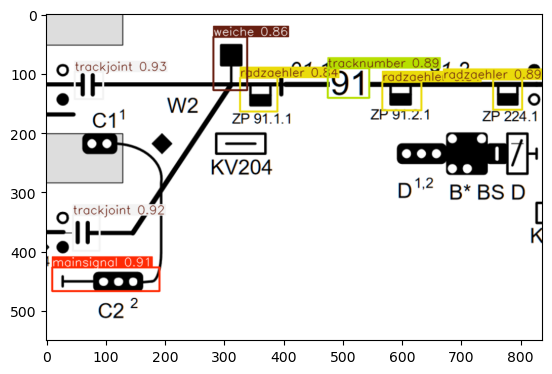

In [73]:
%matplotlib inline
import matplotlib.pyplot as plt

# Loop through each result (there might be multiple results if the input is a batch of images)
for result in results:
    # Convert the annotated result to a format compatible with Matplotlib
    img = result.plot()

    # Display the image using Matplotlib
    plt.imshow(img)
    #plt.axis("off")  # Hide axis
    plt.show()

In [62]:
# del model
# import gc
# gc.collect() 
# torch.cuda.empty_cache()

In [74]:
# Export the model
model.export(format="onnx")

Ultralytics 8.3.27 🚀 Python-3.10.14 torch-2.2.2 CPU (Intel Xeon Platinum 8259CL 2.50GHz)

PyTorch: starting from 'runs/detect/train21/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (48.9 MB)
requirements: Ultralytics requirements ['onnxslim', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.1/157.1 MB 149.0 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 6.0s, installed 2 packages: ['onnxslim', 'onnxruntime-gpu']
requirements: ⚠️ Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: slimming with onnxslim 0.1.36...
ONNX: export success ✅ 10.9s, saved as 'runs/detect/train21/weights/best.onnx' (96.8 MB)

Export complete (12.2s)
Results saved to /home/ec2-user/SageMaker/runs/detect/train21/weights
Predict:         yolo predict task=detect model=runs/detect/train21/weights/best.onnx imgsz=640  
Validate:        yolo v

'runs/detect/train21/weights/best.onnx'

In [75]:
# model.save('yolo11ltrained.ptt')